In [257]:
# import packages 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the packages needed for this part
# create spark and sparkcontext objects
import numpy as np


In [258]:
import os

os.getcwd()

'C:\\Users\\Sumeet Santani'

In [267]:
customer = pd.read_csv('Customer_churn.csv')

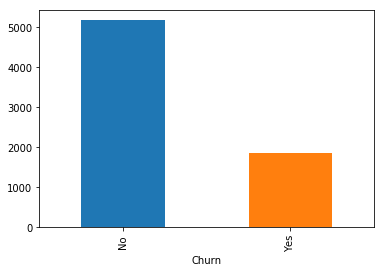

In [268]:
customer.groupby(['Churn']).size().plot(kind = "bar")


In [269]:


customer['gender'] = customer['gender'].map( {'Female':0, 'Male':1,})

customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [271]:
customer
customer = customer.drop(columns= ['customerID','gender'])

In [272]:
list(customer.columns.values)

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [273]:
customer['SeniorCitizen'] = customer['SeniorCitizen'].astype(str)
customer['tenure'] = customer['tenure'].astype(str)


In [274]:
customer.dtypes

SeniorCitizen        object
Partner              object
Dependents           object
tenure               object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [302]:
obj_df = customer.select_dtypes(include=['float64', 'int64']).copy()


In [303]:
obj_df = customer.select_dtypes(include=['object']).copy()
obj_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
5,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes
6,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),1949.4,No
7,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,301.9,No
8,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes
9,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),3487.95,No


In [304]:
obj_df["Partner"] = obj_df["Partner"].astype('category')
obj_df["Dependents"] = obj_df["Dependents"].astype('category')
obj_df["PhoneService"] = obj_df["PhoneService"].astype('category')
obj_df["MultipleLines"] = obj_df["MultipleLines"].astype('category')
obj_df["InternetService"] = obj_df["InternetService"].astype('category')
obj_df["OnlineSecurity"] = obj_df["OnlineSecurity"].astype('category')
obj_df["OnlineBackup"] = obj_df["OnlineBackup"].astype('category')
obj_df["DeviceProtection"] = obj_df["DeviceProtection"].astype('category')
obj_df["TechSupport"] = obj_df["TechSupport"].astype('category')
obj_df["StreamingTV"] = obj_df["StreamingTV"].astype('category')


obj_df["StreamingMovies"] = obj_df["StreamingMovies"].astype('category')
obj_df["Contract"] = obj_df["Contract"].astype('category')
obj_df["StreamingTV"] = obj_df["StreamingTV"].astype('category')


obj_df["PaperlessBilling"] = obj_df["PaperlessBilling"].astype('category')
obj_df["PaymentMethod"] = obj_df["PaymentMethod"].astype('category')
obj_df["TotalCharges"] = obj_df["TotalCharges"].astype('category')

obj_df["SeniorCitizen"] = obj_df["SeniorCitizen"].astype('category')
obj_df["tenure"] = obj_df["tenure"].astype('category')
obj_df["Churn"] = obj_df["Churn"].astype('category')


In [278]:
obj_df.dtypes

SeniorCitizen       category
Partner             category
Dependents          category
tenure              category
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
TotalCharges        category
Churn               category
dtype: object

In [279]:
pd.get_dummies(obj_df, columns=["Partner"]).head()


dataset = pd.get_dummies(obj_df, columns=["Partner","Dependents", "PhoneService","MultipleLines", "InternetService", "OnlineSecurity", "DeviceProtection", "TechSupport","StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "SeniorCitizen"])


dataset = pd.get_dummies(dataset, columns=["OnlineBackup"])


In [280]:
list(dataset.columns.values)

['tenure',
 'TotalCharges',
 'Churn',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'SeniorCiti

In [281]:
hey = pd.read_csv('Customer_churn.csv')

In [282]:
list(hey.columns.values)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [283]:
MonthlyCharges = hey['MonthlyCharges']

In [284]:
dataset['MonthlyCharges'] = MonthlyCharges

Churn = hey['Churn']


In [285]:
dataset['Churn']  = Churn
dataset = dataset.drop(['MonthlyCharges'], axis = 1)

In [286]:
list(dataset.columns.values)

['tenure',
 'TotalCharges',
 'Churn',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'SeniorCiti

In [287]:
dataset = dataset.drop(['Churn'], axis = 1)

In [288]:
dataset['Churn'] = Churn

In [289]:
dataset.head()

,tenure,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,Churn
0,1,29.85,0,1,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,No
1,34,1889.5,1,0,1,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,No
2,2,108.15,1,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,1,Yes
3,45,1840.75,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,No
4,2,151.65,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,Yes


In [290]:
X = dataset.iloc[:, [0, 42]].values
y = dataset.iloc[:, 43].values

In [291]:

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [292]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Sumeet Santani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [293]:

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [294]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [295]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [296]:
cm

array([[1194,  104],
       [ 340,  123]], dtype=int64)

In [297]:
accuracy = sum(np.diag(cm))/np.sum(cm)

In [298]:
accuracy

0.747870528109029

In [299]:
#Precision is the number of true positives over the number of true positives plus the number of false positives = tp/tp+fp
Precision = 1194/(1194+104) 
Precision

0.9198767334360555

In [300]:
#Recall is the number of true positives over the number of true positives plus the number of false negatives = tp/tp+fn
Recall = 1194/(1194+340)
Recall

0.7783572359843546